<a href="https://colab.research.google.com/github/AkashJahid/STHPP/blob/main/AAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# New Section

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.2 MB/s eta 0:00:00


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import matthews_corrcoef

In [ ]:
df_tr = pd.read_csv('/content/AAC Training.csv')
df_ts = pd.read_csv('/content/AAC testing.csv')

In [ ]:
columns = df_tr.columns.tolist()
columns = [c for c in columns if c not in ['Target']]
target = 'Target'
xtrain = df_tr[columns]
ytrain = df_tr[target]

In [ ]:
columns = df_ts.columns.tolist()
columns = [c for c in columns if c not in ['Target']]
target = 'Target'
xtest = df_ts[columns]
ytest = df_ts[target]

**Cross Valadiation**

In [ ]:
cv = KFold(n_splits=5, random_state=1, shuffle=True)

algorithm define : **Random Forest**

In [ ]:
model = RandomForestClassifier(n_estimators = 500, max_depth = 50)

In [ ]:
pred = cross_val_predict(model, xtrain, ytrain, cv=cv, n_jobs=-1)

In [ ]:
# accuracy_score(ytrain,pred), precision_score(ytrain, pred), recall_score(ytrain, pred), f1_score(ytrain, pred)

(0.9304750869061413,
 0.9041769041769042,
 0.9460154241645244,
 0.9246231155778896)

In [ ]:
mcc = matthews_corrcoef(ytrain, pred)
mcc

0.8660902840599802

In [ ]:
cm = confusion_matrix(ytrain,pred)

In [ ]:
cm

array([[1305,  117],
       [  63, 1104]])

In [ ]:
# True Positives (TP)
tp = cm[1, 1]

# True Negatives (TN)
tn = cm[0, 0]

# False Positives (FP)
fp = cm[0, 1]

# False Negatives (FN)
fn = cm[1, 0]

# Sensitivity (True Positive Rate or Recall)
sensitivity = tp / (tp + fn)

# Specificity (True Negative Rate)
specificity = tn / (tn + fp)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.9460154241645244
Specificity: 0.9177215189873418


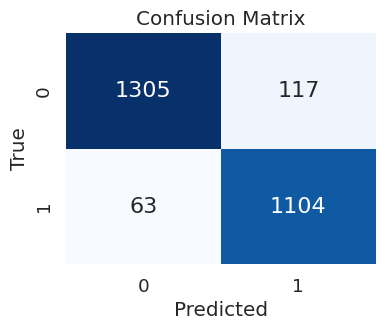

In [ ]:
plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16}, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Independent Test**

In [ ]:
model.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=50, n_estimators=500)

In [ ]:
pred = model.predict(xtest)

In [ ]:
accuracy_score(ytest,pred), precision_score(ytest, pred), recall_score(ytest, pred), f1_score(ytest, pred)

(0.9730769230769231, 0.948905109489051, 1.0, 0.9737827715355805)

In [ ]:
mcc = matthews_corrcoef(ytest, pred)
mcc

0.9330078226479681

In [ ]:
cm=confusion_matrix(ytest,pred)

In [ ]:
cm

array([[123,   7],
       [  0, 130]])

In [ ]:
# True Positives (TP)
tp = cm[1, 1]

# True Negatives (TN)
tn = cm[0, 0]

# False Positives (FP)
fp = cm[0, 1]

# False Negatives (FN)
fn = cm[1, 0]

# Sensitivity (True Positive Rate or Recall)
sensitivity = tp / (tp + fn)

# Specificity (True Negative Rate)
specificity = tn / (tn + fp)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 1.0
Specificity: 0.9461538461538461


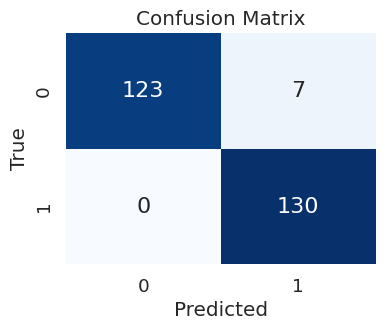

In [ ]:
plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16}, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

xb booster

In [ ]:
model = XGBClassifier(n_estimators = 500,max_depth = 7, base_score = 0.88, learning_rate = 0.2)


In [ ]:
pred = cross_val_predict(model, xtrain, ytrain, cv=cv, n_jobs=-1)

Cross Valadiation

In [ ]:
accuracy_score(ytrain,pred), precision_score(ytrain, pred), recall_score(ytrain, pred), f1_score(ytrain, pred)

(0.9304750869061413, 0.8976631748589847, 0.9545844044558698, 0.925249169435216)

In [ ]:
mcc = matthews_corrcoef(ytrain, pred)
mcc

0.8610749653069627

In [ ]:
cm = confusion_matrix(ytrain,pred)

In [ ]:
cm

array([[1295,  127],
       [  53, 1114]])

In [ ]:
# True Positives (TP)
tp = cm[1, 1]

# True Negatives (TN)
tn = cm[0, 0]

# False Positives (FP)
fp = cm[0, 1]

# False Negatives (FN)
fn = cm[1, 0]

# Sensitivity (True Positive Rate or Recall)
sensitivity = tp / (tp + fn)

# Specificity (True Negative Rate)
specificity = tn / (tn + fp)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.9545844044558698
Specificity: 0.9106891701828411


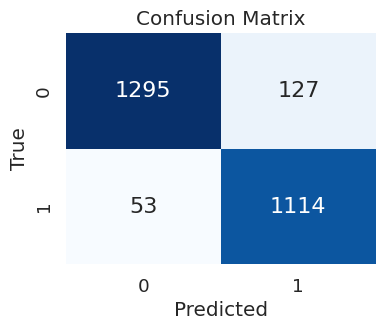

In [ ]:
plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16}, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

indipendent test

In [ ]:
model.fit(xtrain, ytrain)

XGBClassifier(base_score=0.88, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
pred = model.predict(xtest)

In [ ]:
accuracy_score(ytest,pred), precision_score(ytest, pred), recall_score(ytest, pred), f1_score(ytest, pred)

(0.9692307692307692, 0.9420289855072463, 1.0, 0.9701492537313433)

In [ ]:
mcc = matthews_corrcoef( ytest, pred)
mcc

0.9402435700468751

In [ ]:
cm = confusion_matrix(ytest,pred)

In [ ]:
cm

array([[122,   8],
       [  0, 130]])

In [ ]:
# True Positives (TP)
tp = cm[1, 1]

# True Negatives (TN)
tn = cm[0, 0]

# False Positives (FP)
fp = cm[0, 1]

# False Negatives (FN)
fn = cm[1, 0]

# Sensitivity (True Positive Rate or Recall)
sensitivity = tp / (tp + fn)

# Specificity (True Negative Rate)
specificity = tn / (tn + fp)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 1.0
Specificity: 0.9384615384615385


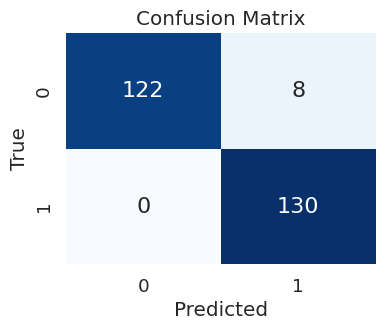

In [ ]:
plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16}, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**LGBM**

In [ ]:
model = LGBMClassifier(max_depth=7, learning_rate=0.5)

In [ ]:
pred = cross_val_predict(model, xtrain, ytrain, cv=cv, n_jobs=-1)

In [ ]:
accuracy_score(ytrain,pred), precision_score(ytrain, pred), recall_score(ytrain, pred), f1_score(ytrain, pred)

(0.9308613364233295,
 0.8977455716586151,
 0.9554413024850043,
 0.9256953092569531)

In [ ]:
mcc = matthews_corrcoef(ytrain, pred)
mcc

0.8626287907497491

In [ ]:
cm = confusion_matrix(ytrain,pred)

In [ ]:
cm

array([[1295,  127],
       [  52, 1115]])

In [ ]:
# True Positives (TP)
tp = cm[1, 1]

# True Negatives (TN)
tn = cm[0, 0]

# False Positives (FP)
fp = cm[0, 1]

# False Negatives (FN)
fn = cm[1, 0]

# Sensitivity (True Positive Rate or Recall)
sensitivity = tp / (tp + fn)

# Specificity (True Negative Rate)
specificity = tn / (tn + fp)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.9554413024850043
Specificity: 0.9106891701828411


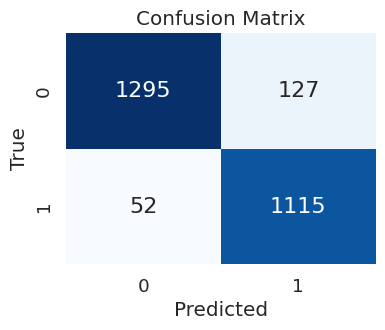

In [ ]:
plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16}, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model.fit(xtrain, ytrain)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1167, number of negative: 1422
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000777 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 821
[LightGBM] [Info] Number of data points in the train set: 2589, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.450753 -> initscore=-0.197628
[LightGBM] [Info] Start training from score -0.197628
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

LGBMClassifier(learning_rate=0.5, max_depth=7)

In [ ]:
pred = model.predict(xtest)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [ ]:
accuracy_score(ytest,pred), precision_score(ytest, pred), recall_score(ytest, pred), f1_score(ytest, pred)

(0.9769230769230769, 0.9558823529411765, 1.0, 0.9774436090225563)

In [ ]:
mcc = matthews_corrcoef(ytest, pred)
mcc

0.954863710632231

In [ ]:
cm = confusion_matrix(ytest,pred)

In [ ]:
cm

array([[124,   6],
       [  0, 130]])

In [ ]:
# True Positives (TP)
tp = cm[1, 1]

# True Negatives (TN)
tn = cm[0, 0]

# False Positives (FP)
fp = cm[0, 1]

# False Negatives (FN)
fn = cm[1, 0]

# Sensitivity (True Positive Rate or Recall)
sensitivity = tp / (tp + fn)

# Specificity (True Negative Rate)
specificity = tn / (tn + fp)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 1.0
Specificity: 0.9538461538461539


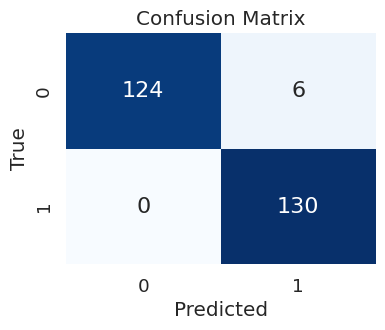

In [ ]:
plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16}, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**CAT** **BOOSTER**

In [ ]:
model = CatBoostClassifier(depth= 10, iterations = 54, learning_rate = 0.2079912391974028)


In [ ]:
pred = cross_val_predict(model, xtrain, ytrain, cv=cv, n_jobs=-1)

In [ ]:
accuracy_score(ytrain,pred), precision_score(ytrain, pred), recall_score(ytrain, pred), f1_score(ytrain, pred)

(0.925067593665508, 0.894566098945661, 0.9451585261353899, 0.9191666666666667)

In [ ]:
mcc = matthews_corrcoef(ytrain, pred)
mcc

0.8505472627960576

In [ ]:
cm = confusion_matrix(ytrain,pred)

In [ ]:
cm

array([[1292,  130],
       [  64, 1103]])

In [ ]:
# True Positives (TP)
tp = cm[1, 1]

# True Negatives (TN)
tn = cm[0, 0]

# False Positives (FP)
fp = cm[0, 1]

# False Negatives (FN)
fn = cm[1, 0]

# Sensitivity (True Positive Rate or Recall)
sensitivity = tp / (tp + fn)

# Specificity (True Negative Rate)
specificity = tn / (tn + fp)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.9451585261353899
Specificity: 0.9085794655414908


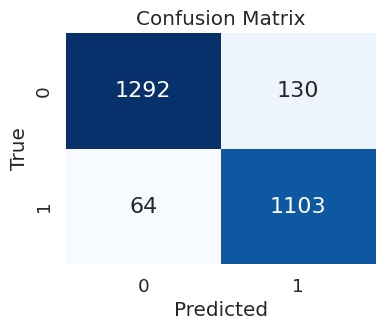

In [ ]:
plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16}, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model.fit(xtrain, ytrain)

0:	learn: 0.5662096	total: 60.9ms	remaining: 3.23s
1:	learn: 0.4699212	total: 72.3ms	remaining: 1.88s
2:	learn: 0.3993522	total: 83.5ms	remaining: 1.42s
3:	learn: 0.3555413	total: 96.2ms	remaining: 1.2s
4:	learn: 0.3228807	total: 110ms	remaining: 1.07s
5:	learn: 0.3005085	total: 121ms	remaining: 970ms
6:	learn: 0.2619523	total: 133ms	remaining: 890ms
7:	learn: 0.2461547	total: 144ms	remaining: 828ms
8:	learn: 0.2302948	total: 155ms	remaining: 777ms
9:	learn: 0.2189085	total: 167ms	remaining: 737ms
10:	learn: 0.2096706	total: 179ms	remaining: 699ms
11:	learn: 0.2011306	total: 190ms	remaining: 666ms
12:	learn: 0.1922187	total: 202ms	remaining: 636ms
13:	learn: 0.1820118	total: 213ms	remaining: 608ms
14:	learn: 0.1741716	total: 224ms	remaining: 583ms
15:	learn: 0.1654105	total: 235ms	remaining: 558ms
16:	learn: 0.1591471	total: 247ms	remaining: 537ms
17:	learn: 0.1566055	total: 258ms	remaining: 516ms
18:	learn: 0.1511508	total: 270ms	remaining: 497ms
19:	learn: 0.1428236	total: 282ms	rema

In [ ]:
pred = model.predict(xtest)

In [ ]:
accuracy_score(ytest,pred), precision_score(ytest, pred), recall_score(ytest, pred), f1_score(ytest, pred)

(0.9692307692307692, 0.9420289855072463, 1.0, 0.9701492537313433)

In [ ]:
mcc = matthews_corrcoef(ytest, pred)
mcc

0.9402435700468751

In [ ]:
cm = confusion_matrix(ytest,pred)

In [ ]:
cm

array([[122,   8],
       [  0, 130]])

In [ ]:
# True Positives (TP)
tp = cm[1, 1]

# True Negatives (TN)
tn = cm[0, 0]

# False Positives (FP)
fp = cm[0, 1]

# False Negatives (FN)
fn = cm[1, 0]

# Sensitivity (True Positive Rate or Recall)
sensitivity = tp / (tp + fn)

# Specificity (True Negative Rate)
specificity = tn / (tn + fp)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)


Sensitivity: 1.0
Specificity: 0.9384615384615385


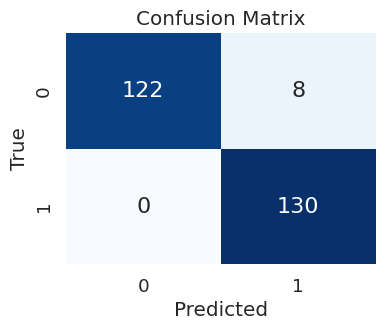

In [ ]:
plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16}, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Stacking**

In [ ]:
estimator = [('RF',RandomForestClassifier(n_estimators = 400, max_depth = 10)),
             ('XGB',XGBClassifier(n_estimators = 500,max_depth = 7, base_score = 0.88, learning_rate = 0.2)),
             ('LGBM',LGBMClassifier(max_depth=7, learning_rate=0.5)),
             ('CAT',CatBoostClassifier(depth= 10, iterations = 54, learning_rate = 0.2079912391974028))]
model = StackingClassifier(estimators=estimator, final_estimator=CatBoostClassifier(depth= 10, iterations = 54, learning_rate = 0.2079912391974028))

In [ ]:
pred = cross_val_predict(model, xtrain, ytrain, cv=cv, n_jobs=-1)

In [ ]:
accuracy_score(ytrain,pred), precision_score(ytrain, pred), recall_score(ytrain, pred), f1_score(ytrain, pred)

(0.9451525685592893,
 0.9460400348128808,
 0.9314481576692374,
 0.9386873920552676)

In [ ]:
mcc = matthews_corrcoef(ytrain, pred)
mcc

0.8899465140002979

In [ ]:
cm = confusion_matrix(ytrain,pred)

In [ ]:
cm

array([[1360,   62],
       [  80, 1087]])

In [ ]:
# True Positives (TP)
tp = cm[1, 1]

# True Negatives (TN)
tn = cm[0, 0]

# False Positives (FP)
fp = cm[0, 1]

# False Negatives (FN)
fn = cm[1, 0]

# Sensitivity (True Positive Rate or Recall)
sensitivity = tp / (tp + fn)

# Specificity (True Negative Rate)
specificity = tn / (tn + fp)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.9314481576692374
Specificity: 0.9563994374120957


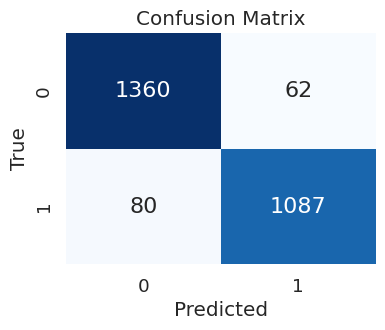

In [ ]:
plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16}, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model.fit(xtrain, ytrain)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1167, number of negative: 1422
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000880 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 821
[LightGBM] [Info] Number of data points in the train set: 2589, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.450753 -> initscore=-0.197628
[LightGBM] [Info] Start training from score -0.197628
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

StackingClassifier(estimators=[('RF',
                                RandomForestClassifier(max_depth=10,
                                                       n_estimators=400)),
                               ('XGB',
                                XGBClassifier(base_score=0.88, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=Non...
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=500, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('LGBM',
                                LGBMClassifier(learning_rate=0.5, max_depth=7)),
                               ('CAT',
                                <catboost.core.CatBoostClassifier object at 0x780657739210>)],
                   final_estimator=<catboost.core.CatBoostClassifier object at 0x78065773b190>)

In [ ]:
pred = model.predict(xtest)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [ ]:
accuracy_score(ytest,pred), precision_score(ytest, pred), recall_score(ytest, pred), f1_score(ytest, pred)

(0.9807692307692307,
 0.9699248120300752,
 0.9923076923076923,
 0.9809885931558935)

In [ ]:
mcc = matthews_corrcoef(ytest, pred)
mcc

0.9771833083127817

In [ ]:
cm = confusion_matrix(ytest,pred)

In [ ]:
cm

array([[126,   4],
       [  1, 129]])

In [ ]:
# True Positives (TP)
tp = cm[1, 1]

# True Negatives (TN)
tn = cm[0, 0]

# False Positives (FP)
fp = cm[0, 1]

# False Negatives (FN)
fn = cm[1, 0]

# Sensitivity (True Positive Rate or Recall)
sensitivity = tp / (tp + fn)

# Specificity (True Negative Rate)
specificity = tn / (tn + fp)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.9923076923076923
Specificity: 0.9692307692307692


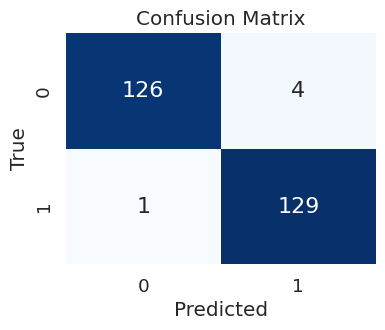

In [ ]:
plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16}, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()